In [56]:
import pandas as pd
import requests
import seaborn as sns
import matplotlib.pyplot as plt

In [57]:
# Read and getting the excel file for the data
df= pd.read_csv("ai_impact_student_performance_dataset.csv")


df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   student_id                       8000 non-null   int64  
 1   age                              8000 non-null   int64  
 2   gender                           8000 non-null   object 
 3   grade_level                      8000 non-null   object 
 4   study_hours_per_day              8000 non-null   float64
 5   uses_ai                          8000 non-null   int64  
 6   ai_usage_time_minutes            8000 non-null   int64  
 7   ai_tools_used                    6638 non-null   object 
 8   ai_usage_purpose                 6654 non-null   object 
 9   ai_dependency_score              8000 non-null   int64  
 10  ai_generated_content_percentage  8000 non-null   int64  
 11  ai_prompts_per_week              8000 non-null   int64  
 12  ai_ethics_score     

In [58]:
#Dropping identifiers as we don't need to know individual student performances
df.drop(columns=['student_id'])

,age,gender,grade_level,study_hours_per_day,uses_ai,ai_usage_time_minutes,ai_tools_used,ai_usage_purpose,ai_dependency_score,ai_generated_content_percentage,...,concept_understanding_score,study_consistency_index,improvement_rate,sleep_hours,social_media_hours,tutoring_hours,class_participation_score,final_score,passed,performance_category
0,20,Female,1st Year,2.5,1,170,NaN,Exam Prep,10,29,...,4,9.0,8.1,7.2,1.5,4.6,6,36.8,0,Low
1,17,Male,12th,3.4,1,123,NaN,Notes,4,14,...,8,8.5,13.8,7.6,5.1,2.7,6,65.5,1,Medium
2,24,Male,3rd Year,0.8,0,35,Copilot,Doubt Solving,8,82,...,7,2.1,39.1,5.7,0.2,4.0,3,66.3,1,Medium
3,21,Female,12th,4.4,0,45,ChatGPT+Gemini,Notes,3,74,...,5,6.7,25.2,8.2,4.2,2.9,2,69.5,1,Medium
4,18,Other,3rd Year,3.5,1,21,ChatGPT+Gemini,Coding,2,83,...,5,5.4,2.7,8.7,0.2,2.9,2,49.7,1,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,23,Male,3rd Year,3.0,0,178,Gemini,NaN,6,61,...,5,8.1,19.2,8.3,1.9,1.0,10,49.7,1,Low
7996,21,Other,1st Year,3.3,0,63,Claude,Exam Prep,10,83,...,6,5.7,3.0,5.0,1.3,2.9,5,58.4,1,Medium
7997,24,Male,3rd Year,1.6,0,113,ChatGPT,Coding,5,23,...,6,4.5,-18.0,5.0,3.5,0.1,9,69.1,1,Medium
7998,22,Female,2nd Year,5.5,0,21,Copilot,Coding,5,68,...,8,3.4,-19.1,4.7,5.9,0.4,7,49.2,1,Low


In [59]:
#Columns similar to our final variable to drop, if our target variable is the final score
drop_columns = ["last_exam_score",
    "assignment_scores_avg",
    "attendance_percentage",
    "concept_understanding_score",
    "study_consistency_index",
    "improvement_rate",
    "class_participation_score",
    "ai_generated_content_percentage",
    "performance_category"]


In [60]:
#Dropping these variables as they're very similar to final score
df.drop(columns=drop_columns)

,student_id,age,gender,grade_level,study_hours_per_day,uses_ai,ai_usage_time_minutes,ai_tools_used,ai_usage_purpose,ai_dependency_score,ai_prompts_per_week,ai_ethics_score,sleep_hours,social_media_hours,tutoring_hours,final_score,passed
0,1,20,Female,1st Year,2.5,1,170,NaN,Exam Prep,10,56,5,7.2,1.5,4.6,36.8,0
1,2,17,Male,12th,3.4,1,123,NaN,Notes,4,65,1,7.6,5.1,2.7,65.5,1
2,3,24,Male,3rd Year,0.8,0,35,Copilot,Doubt Solving,8,8,5,5.7,0.2,4.0,66.3,1
3,4,21,Female,12th,4.4,0,45,ChatGPT+Gemini,Notes,3,106,10,8.2,4.2,2.9,69.5,1
4,5,18,Other,3rd Year,3.5,1,21,ChatGPT+Gemini,Coding,2,7,10,8.7,0.2,2.9,49.7,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,7996,23,Male,3rd Year,3.0,0,178,Gemini,NaN,6,112,7,8.3,1.9,1.0,49.7,1
7996,7997,21,Other,1st Year,3.3,0,63,Claude,Exam Prep,10,8,2,5.0,1.3,2.9,58.4,1
7997,7998,24,Male,3rd Year,1.6,0,113,ChatGPT,Coding,5,100,8,5.0,3.5,0.1,69.1,1
7998,7999,22,Female,2nd Year,5.5,0,21,Copilot,Coding,5,63,7,4.7,5.9,0.4,49.2,1


In [61]:
#Identifying variables that are considered features and would contribute to the research question of "Does AI Usage impact academics?"
feature_columns = ['age', 'gender', 'grade_level', 'study_hours_per_day',
                   'sleep_hours', 'social_media_hours', 'tutoring_hours', 'uses_ai',
                   'ai_usage_time_minutes', 'ai_dependency_score',
                    'ai_prompts_per_week',]

In [62]:
df_copy = df[feature_columns + ['final_score']]

In [63]:
#Dropped any values with NA, to keep the data clean
df_copy = df_copy.dropna(subset=feature_columns + ['final_score'])

In [ ]:
# Used describe to check for any outrageous outliers to see if there's any need for removal
df_copy.describe()

,age,study_hours_per_day,sleep_hours,social_media_hours,tutoring_hours,uses_ai,ai_usage_time_minutes,ai_dependency_score,ai_prompts_per_week,final_score
count,8000.00000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,18.96725,3.286938,6.465025,3.010600,2.523387,0.641000,88.989875,5.515125,59.359500,56.811988
std,3.15316,1.582171,1.435670,1.744974,1.436991,0.479737,52.184077,2.883064,34.869496,13.455724
min,14.00000,0.500000,4.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,12.700000
25%,16.00000,1.900000,5.200000,1.500000,1.300000,0.000000,43.000000,3.000000,29.000000,47.300000
50%,19.00000,3.300000,6.400000,3.000000,2.500000,1.000000,89.000000,6.000000,59.000000,56.900000
75%,22.00000,4.600000,7.700000,4.500000,3.800000,1.000000,134.000000,8.000000,90.000000,66.200000
max,24.00000,6.000000,9.000000,6.000000,5.000000,1.000000,179.000000,10.000000,119.000000,95.800000


In [ ]:
#Looking at the copy again to see if there are any NA or null values in the columns
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   age                    8000 non-null   int64  
 1   gender                 8000 non-null   object 
 2   grade_level            8000 non-null   object 
 3   study_hours_per_day    8000 non-null   float64
 4   sleep_hours            8000 non-null   float64
 5   social_media_hours     8000 non-null   float64
 6   tutoring_hours         8000 non-null   float64
 7   uses_ai                8000 non-null   int64  
 8   ai_usage_time_minutes  8000 non-null   int64  
 9   ai_dependency_score    8000 non-null   int64  
 10  ai_prompts_per_week    8000 non-null   int64  
 11  final_score            8000 non-null   float64
dtypes: float64(5), int64(5), object(2)
memory usage: 750.1+ KB


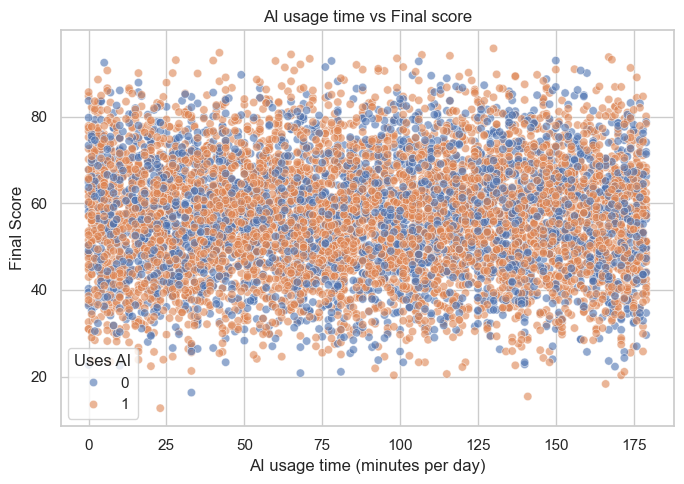

In [ ]:
#A simple scatterplot after cleaning our data, to compare AI use and those who don't to their final score.
sns.set(style="whitegrid")


#Colored them to make it easier to know who is using AI and who is not
plt.figure(figsize=(7,5))
sns.scatterplot(
    data=df_copy,
    x='ai_usage_time_minutes',
    y='final_score',
    hue='uses_ai',
    alpha=0.6
)


plt.title("AI usage time vs Final score")
plt.xlabel('AI usage time (minutes per day)')
plt.ylabel('Final Score')
plt.legend(title="Uses AI")
plt.tight_layout()
plt.show()

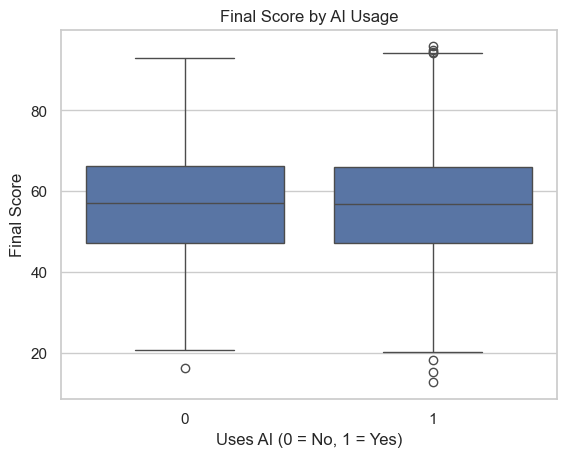

In [ ]:
#Easier way of looking at the data compared to the scatterplot
sns.boxplot(
    data=df_copy,
    x="uses_ai",
    y="final_score",
)

# Used a boxplot to make it easier to see the previous numbers and make it more easily identifiable for the user
plt.title("Final Score by AI Usage")
plt.xlabel('Uses AI (0 = No, 1 = Yes)')
plt.ylabel('Final Score')
plt.show()

In [75]:
df_copy.groupby(["gender", "uses_ai"])["final_score"].median().reset_index()

,gender,uses_ai,final_score
0,Female,0,57.1
1,Female,1,56.9
2,Male,0,57.0
3,Male,1,56.9
4,Other,0,56.3
5,Other,1,55.4


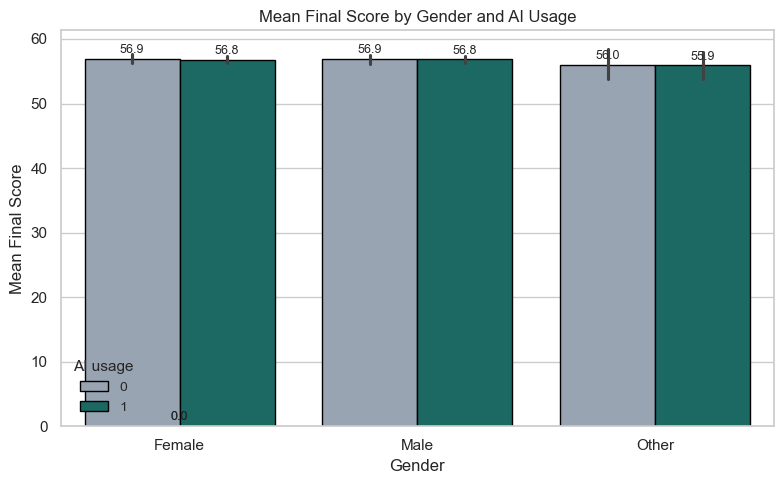

In [ ]:
# Make uses_ai a categorical with labels (optional but nicer)


plt.figure(figsize=(8, 5))
ax = sns.barplot(
    data=df_copy,
    x="gender",
    y="final_score",
    hue="uses_ai",
    palette={0: "#94a3b8", 1: "#0f766e"},  # custom colors
    edgecolor="black"
)

plt.title("Mean Final Score by Gender and AI Usage")
plt.xlabel("Gender")
plt.ylabel("Mean Final Score")

for p in ax.patches:
    height = p.get_height()
    ax.annotate(
        f"{height:.1f}",                    # format mean
        (p.get_x() + p.get_width() / 2, height),
        ha="center",
        va="bottom",
        fontsize=9,
        xytext=(0, 2),
        textcoords="offset points"
    )

# Used a barplot to compare the median scores for all the genders, so to get an idea of what the grades would be like for
# those who do and don't use AI.

#Make it a heat matrix chart
plt.legend(title="AI usage", title_fontsize=11, fontsize=10, frameon=False, loc="best")

plt.tight_layout()
plt.show()


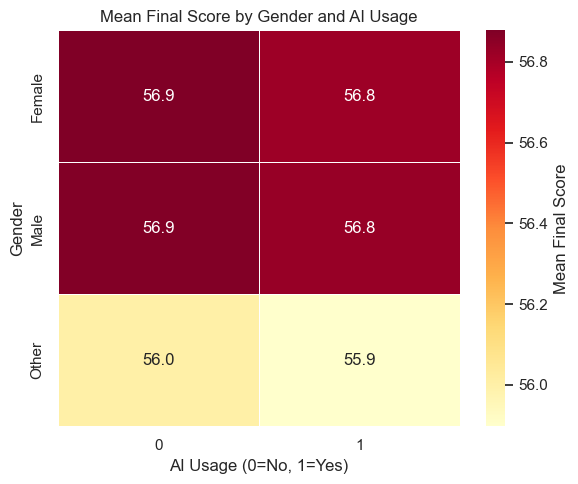

In [ ]:
#Made a heat matrix correlation so its easier to understand instead of the bar chart

pivot_table = df_copy.groupby(['gender', 'uses_ai'])['final_score'].mean().unstack()

plt.figure(figsize=(6, 5))
sns.heatmap(
    pivot_table,
    annot=True,           # Show mean values in cells
    fmt='.1f',            # 1 decimal place
    cmap='YlOrRd',        # Yellow-orange-red (higher = warmer)
    cbar_kws={'label': 'Mean Final Score'},
    linewidths=0.5,       # Grid lines between cells
    edgecolor='black'
)

plt.title('Mean Final Score by Gender and AI Usage')
plt.xlabel('AI Usage (0=No, 1=Yes)')
plt.ylabel('Gender')
plt.tight_layout()
plt.show()

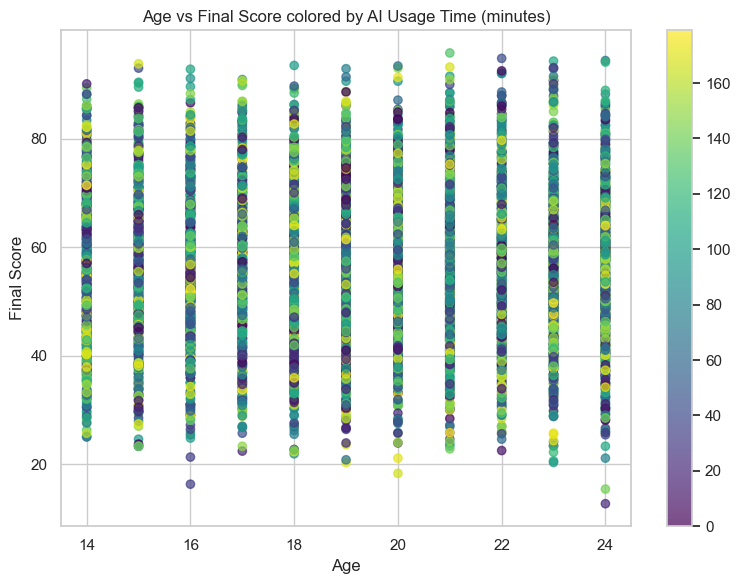

In [69]:
plt.figure(figsize=(8,6))
scatter = plt.scatter(
    df_copy["age"],
    df_copy["final_score"],
    c=df_copy["ai_usage_time_minutes"],
    cmap="viridis",
    alpha=0.7
)

plt.xlabel("Age")
plt.ylabel("Final Score")
plt.title("Age vs Final Score colored by AI Usage Time (minutes)")

cbar = plt.colorbar(scatter)

plt.tight_layout()
plt.show()

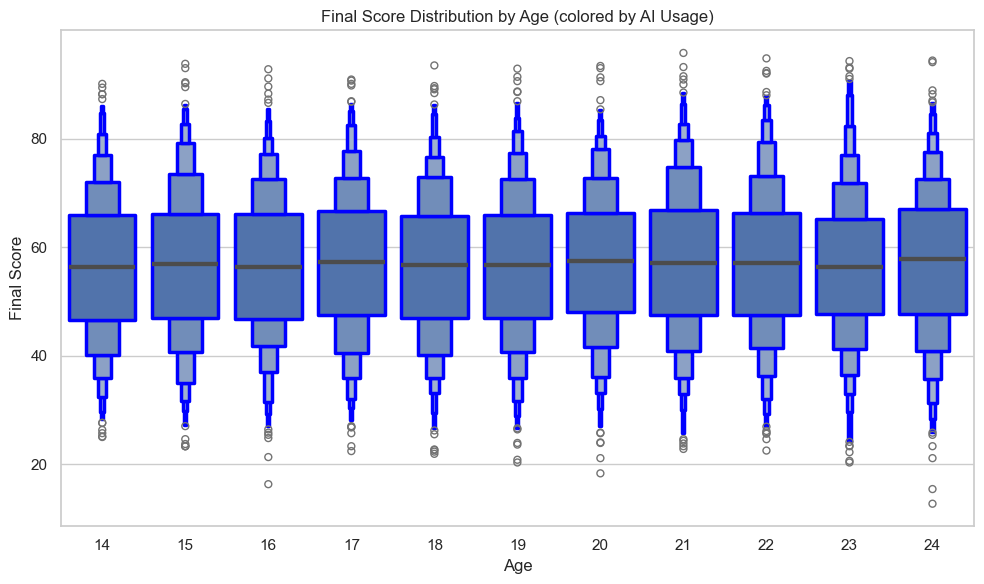

In [ ]:
# made a boxemplot to make it easier to understand instead of the scatterplot above.
plt.figure(figsize=(10, 6))
sns.boxenplot(
    data=df_copy,
    x="age",
    y="final_score",
    linewidth=2.5,       # Thicker edges
    edgecolor="blue",   # Bold black borders
    saturation=0.9,         # Brighter, more vivid fills
)

plt.xlabel("Age")
plt.ylabel("Final Score")
plt.title("Final Score Distribution by Age (colored by AI Usage)")
plt.tight_layout()
plt.show()

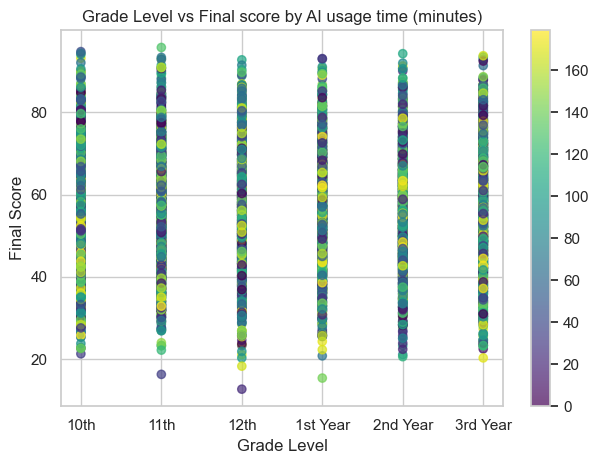

In [70]:
# Sorting the values in order so it looks nicer
df_copy = df_copy.sort_values("grade_level")
    

plt.Figure(figsize=(8,6))
gradeScatter = plt.scatter(
    df_copy["grade_level"],
    df_copy["final_score"],
    c=df_copy["ai_usage_time_minutes"],
    cmap="viridis",
    alpha=0.7
)

plt.xlabel("Grade Level")
plt.ylabel("Final Score")
plt.title("Grade Level vs Final score by AI usage time (minutes)")

cbar = plt.colorbar(gradeScatter)


plt.tight_layout()
plt.show()



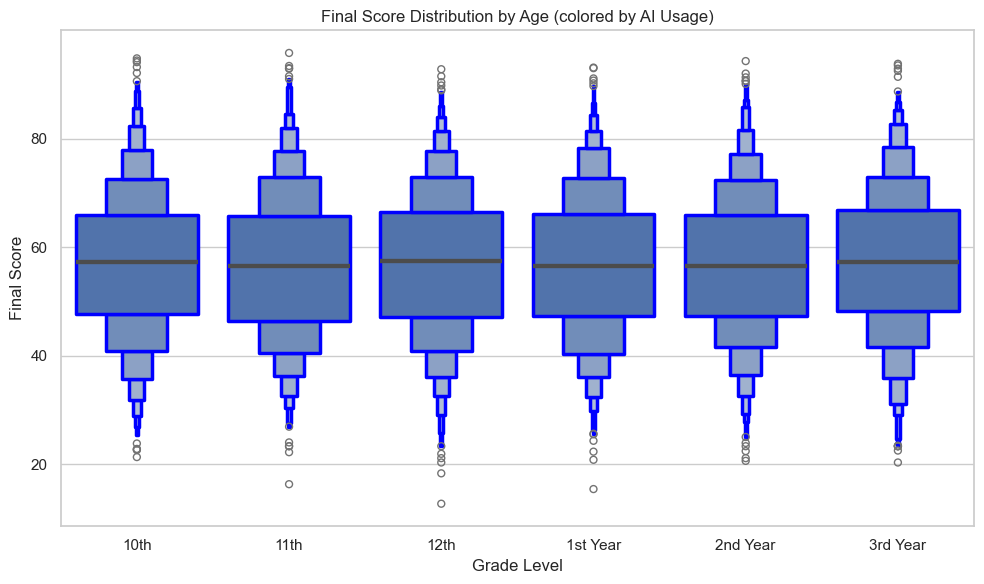

In [ ]:
# Made another boxemplot to make it easier to understand for the bar chart involving grade level.
plt.figure(figsize=(10, 6))
sns.boxenplot(
    data=df_copy,
    x="grade_level",
    y="final_score",
    linewidth=2.5,       # Thicker edges
    edgecolor="blue",   # Bold black borders
    saturation=0.9,         # Brighter, more vivid fills
)

plt.xlabel("Grade Level")
plt.ylabel("Final Score")
plt.title("Final Score Distribution by Age")
plt.tight_layout()
plt.show()